### PART2: EXPLORATORY DATA ANALYSIS

In this chapter we perform exploratory data analysis on the curated data, calculate the <b>Lipinski</b> descriptors and combine our curated data with the descriptors. we convert the IC50 to pIC50 values, then we shall normalize the standard_value column and perform statistical analysis using the <b>Mann-whitney U test</b>.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from chembl_webresource_client.new_client import new_client

### Load our curated dataframe.

In [2]:
df = pd.read_csv('acetylchol_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
7054,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.00,active
7055,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.40,active
7056,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.20,active
7057,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19,active


In [3]:
df_no_smiles = df.drop(columns= 'canonical_smiles')

In [4]:
smiles = []

for i in df.canonical_smiles.tolist():
    
    cpd = str(i).split('.')
    
    cpd_longest = max(cpd, key=len)
    
    smiles.append(cpd_longest)
    
smiles = pd.Series(smiles, name='canonical_smiles')

In [5]:
df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
7054,CHEMBL5087646,184.00,active,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2
7055,CHEMBL5078914,13.40,active,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...
7056,CHEMBL5073819,19.20,active,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1
7057,CHEMBL5072428,4.19,active,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1


In [6]:
def lipinski (smiles, verbose=False):
    
    moldata = []
    
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    base_data = np.arange(1,1)
    i = 0
    for mol in moldata:
        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
        
        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        
        if(i==0):
            base_data = row
            
        else:
            base_data = np.vstack([base_data, row])
        i = i + 1
        
    columnNames = ['MW','LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data=base_data, columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
7054,446.591,6.5126,3.0,4.0
7055,481.036,7.1660,3.0,4.0
7056,402.582,6.8144,2.0,3.0
7057,437.027,7.4678,2.0,3.0


### Next we combine the curated dataframe and Lipinski dataframe

In [8]:
df_combined = pd.concat([df, df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
7054,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,184.00,active,446.591,6.5126,3.0,4.0
7055,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,13.40,active,481.036,7.1660,3.0,4.0
7056,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,19.20,active,402.582,6.8144,2.0,3.0
7057,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,4.19,active,437.027,7.4678,2.0,3.0


### Next we convert the IC50 to pIC50

In [9]:
def pIC50(input):
    
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i *(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
        
    input['pIC50'] = pIC50
    
    x = input.drop('standard_value_norm', 1)
    
    return x        

NB: values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithm value will become negative.

In [10]:
df_combined['standard_value'].describe()

count    5.880000e+03
mean     1.075065e+05
std      9.411712e+05
min      0.000000e+00
25%      1.465000e+02
50%      2.355000e+03
75%      1.705500e+04
max      4.960000e+07
Name: standard_value, dtype: float64

### Next we normalize the standard_value column

In [11]:
-np.log10((10**-9)*100000000)

1.0

In [12]:
-np.log10((10**-9)*10000000000)

-1.0

In [13]:
def norm_value(input):
    
    norm = []
    
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
        
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
    
    return x

In [14]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.00
...,...,...,...,...,...,...,...,...
7054,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,184.00
7055,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,13.40
7056,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,19.20
7057,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,4.19


In [15]:
final_df =pIC50(df_norm)
final_df

C:\Users\nenec\AppData\Local\Temp\ipykernel_23528\1421120097.py:7: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
C:\Users\nenec\AppData\Local\Temp\ipykernel_23528\1421120097.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
7054,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,6.735182
7055,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,7.872895
7056,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,7.716699
7057,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,8.377786


In [48]:
final_df.to_csv('acetylchol_pic50.csv', index=False)

In [16]:
final_df[final_df['class'] == 'active']

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
6,CHEMBL130098,CSc1nc(-c2ccc(Cl)cc2)nn1C(=O)N(C)C,active,296.783,2.8501,0.0,5.0,7.000000
...,...,...,...,...,...,...,...,...
7054,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,6.735182
7055,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,7.872895
7056,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,7.716699
7057,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,8.377786


In [17]:
# Let us see the statistical description of our pIC50 column.

In [18]:
final_df['pIC50'].describe()

count    5880.000000
mean             inf
std              NaN
min         1.304518
25%         4.768149
50%         5.628010
75%         6.834170
max              inf
Name: pIC50, dtype: float64

So since we are not interested in the intermediate class of compounds, we can drop the intermediate class of compounds.

In [19]:
final_df1 = final_df[final_df['class'] != 'intermediate']
final_df1

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
7054,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,6.735182
7055,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,7.872895
7056,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,7.716699
7057,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,8.377786


In [20]:
final_df1.isnull().sum()

molecule_chembl_id    0
canonical_smiles      0
class                 0
MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
pIC50                 0
dtype: int64

In [21]:
final_df1.pIC50.describe()

count    4414.000000
mean             inf
std              NaN
min         1.304518
25%         4.508638
50%         6.186086
75%         7.167459
max              inf
Name: pIC50, dtype: float64

In [22]:
final_df1['pIC50']

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
7054    6.735182
7055    7.872895
7056    7.716699
7057    8.377786
7058    8.000000
Name: pIC50, Length: 4414, dtype: float64

In [23]:
final_df1.isin([np.inf, -np.inf]).sum()

molecule_chembl_id    0
canonical_smiles      0
class                 0
MW                    0
LogP                  0
NumHDonors            0
NumHAcceptors         0
pIC50                 1
dtype: int64

In [24]:
final_df1.replace([np.inf, -np.inf], np.nan, inplace=True)
final_df1

C:\Users\nenec\AppData\Local\Temp\ipykernel_23528\2632032236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1.replace([np.inf, -np.inf], np.nan, inplace=True)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
7054,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,6.735182
7055,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,7.872895
7056,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,7.716699
7057,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,8.377786


In [25]:
final_df1.dropna(inplace=True)
final_df1

C:\Users\nenec\AppData\Local\Temp\ipykernel_23528\1765481920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1.dropna(inplace=True)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
7054,CHEMBL5087646,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3ccccc13)CCCC2,active,446.591,6.5126,3.0,4.0,6.735182
7055,CHEMBL5078914,O=C(O)c1c(O)cccc1CCCCCCCCNc1c2c(nc3cc(Cl)ccc13...,active,481.036,7.1660,3.0,4.0,7.872895
7056,CHEMBL5073819,Oc1cccc(CCCCCCCCNc2c3c(nc4ccccc24)CCCC3)c1,active,402.582,6.8144,2.0,3.0,7.716699
7057,CHEMBL5072428,Oc1cccc(CCCCCCCCNc2c3c(nc4cc(Cl)ccc24)CCCC3)c1,active,437.027,7.4678,2.0,3.0,8.377786


In [26]:
final_df1.pIC50.describe()

count    4413.000000
mean        5.946001
std         1.791353
min         1.304518
25%         4.508638
50%         6.185752
75%         7.167363
max        14.301030
Name: pIC50, dtype: float64

### Frequency plot of the 2 bioactivity classes

In [49]:
final_df1.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv', index=False)

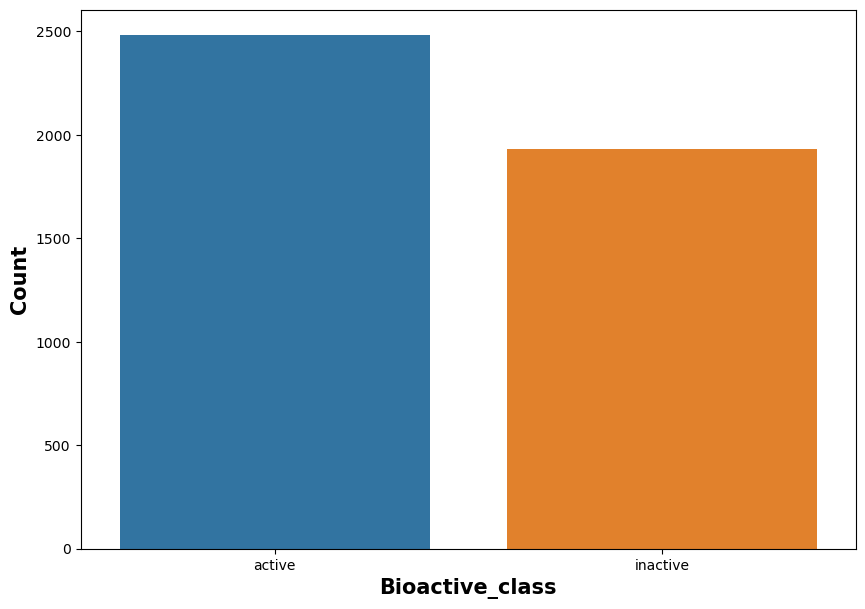

In [27]:
plt.figure(figsize=(10, 7))

sns.countplot(x='class', data=final_df1)

plt.ylabel('Count', fontsize=15, fontweight='bold')

plt.xlabel('Bioactive_class', fontsize=15, fontweight='bold')

plt.show()

### scattered plot of MW vs LOGP

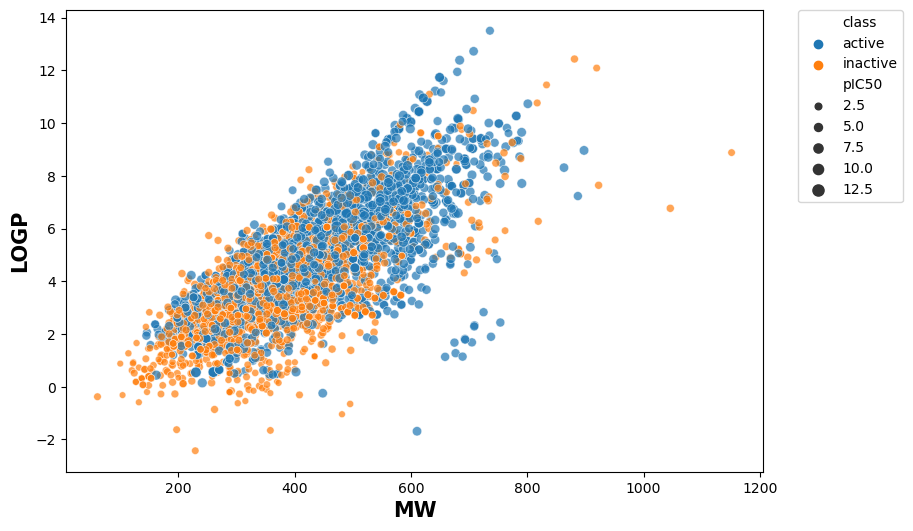

In [28]:
plt.figure(figsize=(9,6))

sns.scatterplot(x=final_df1['MW'], y= final_df1['LogP'], hue=final_df1['class'], size=final_df1['pIC50'], alpha=0.7)

plt.xlabel('MW', fontsize=15, fontweight='bold')

plt.ylabel('LOGP', fontsize=15, fontweight='bold')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.show()

There appears to be close correlation between the two bioactivity classes.

### Box plot of bioactivity class and pIC50.

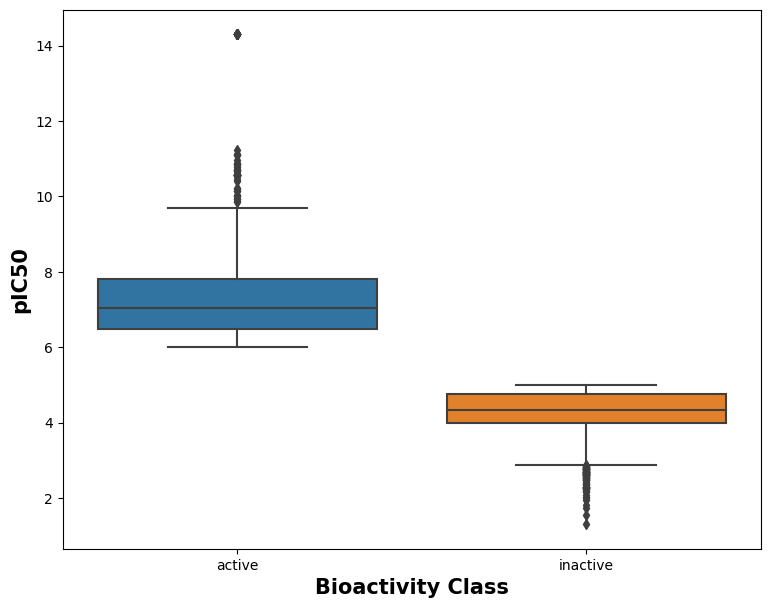

In [29]:
plt.figure(figsize=(9,7))

sns.boxplot(x=final_df1['class'], y=final_df1['pIC50'])

plt.ylabel('pIC50', fontsize=15, fontweight='bold')

plt.xlabel('Bioactivity Class', fontsize=15, fontweight='bold')

plt.show()

Notice that there are upper outliers in the <b>active</b> bioactivity class of the pIC50 and lower outliers in the <b>inactive</b> bioactivity class.

### Statistical Analysis | Mann-Whitney U Test.

In [32]:
def mannwhitney (descriptor, verbose=False):
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
    # seed the random number generator
    
    seed(1)
    
    # Active and Inactives
    
    selection = [descriptor, 'class']
    
    df = final_df1[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]
    
    selection = [descriptor, 'class']
    
    df = final_df1[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]
    
    #compare samples
    
    stat, p = mannwhitneyu(active, inactive)
    #print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # Interprete
    alpha = 0.05
    if p > alpha:
        interprete = 'Same distribution (fail to reject null hypothesis(H0))'
    else:
        interpretation = 'Different distribution (reject H0)'
        
    results = pd.DataFrame({'Descriptors':descriptor, 'Statistics': stat, 'p':p, 'alpha':alpha,
                           'Interpretation':interpretation}, index=[0])
    
    filename = 'mannwhitneyu' + descriptor + '.csv'
    results.to_csv(filename)
    
    
    return results

In [33]:
mannwhitney('pIC50')

,Descriptors,Statistics,p,alpha,Interpretation
0,pIC50,4793292.0,0.0,0.05,Different distribution (reject H0)


### Boxplot of MW

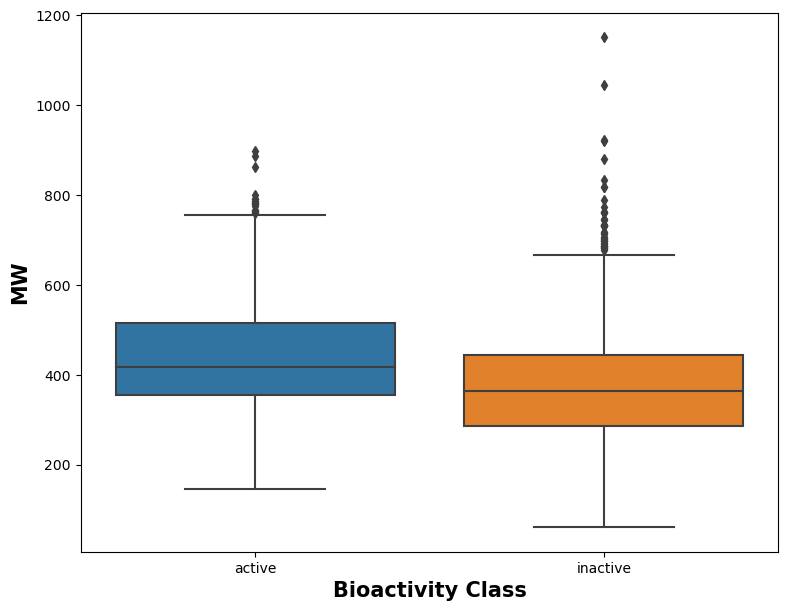

In [34]:
plt.figure(figsize=(9,7))

sns.boxplot(x=final_df1['class'], y=final_df1['MW'])

plt.ylabel('MW', fontsize=15, fontweight='bold')

plt.xlabel('Bioactivity Class', fontsize=15, fontweight='bold')

plt.show()

In [35]:
mannwhitney('MW')

,Descriptors,Statistics,p,alpha,Interpretation
0,MW,3116496.5,7.028618e-66,0.05,Different distribution (reject H0)


### Boxplot of LogP

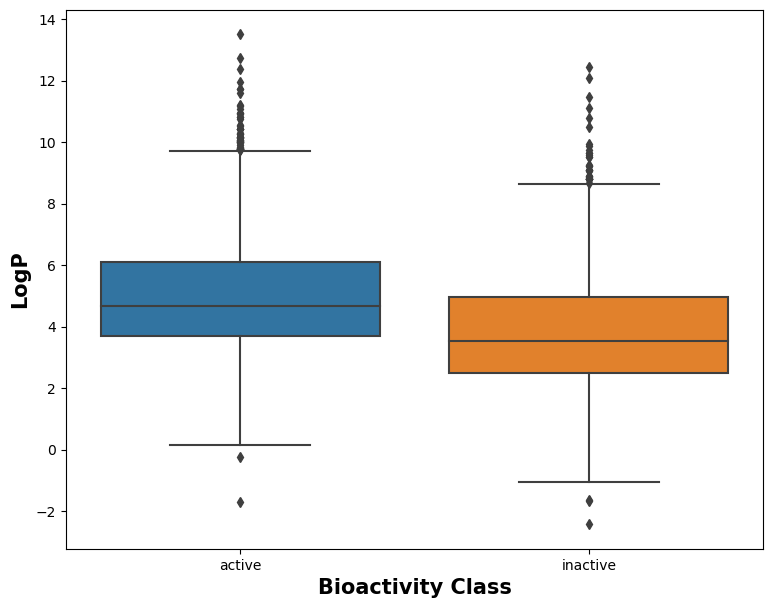

In [36]:
plt.figure(figsize=(9,7))

sns.boxplot(x=final_df1['class'], y=final_df1['LogP'])

plt.ylabel('LogP', fontsize=15, fontweight='bold')

plt.xlabel('Bioactivity Class', fontsize=15, fontweight='bold')

plt.show()

In [37]:
mannwhitney('LogP')

,Descriptors,Statistics,p,alpha,Interpretation
0,LogP,3239413.5,1.328026e-89,0.05,Different distribution (reject H0)


### Boxplot of NumHDonors

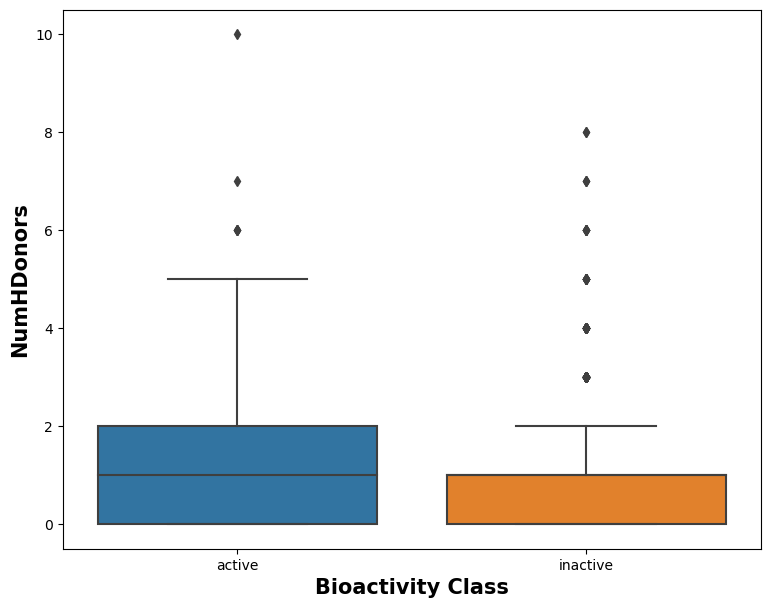

In [39]:
plt.figure(figsize=(9,7))

sns.boxplot(x=final_df1['class'], y=final_df1['NumHDonors'])

plt.ylabel('NumHDonors', fontsize=15, fontweight='bold')

plt.xlabel('Bioactivity Class', fontsize=15, fontweight='bold')

plt.show()

In [40]:
mannwhitney('NumHDonors')

,Descriptors,Statistics,p,alpha,Interpretation
0,NumHDonors,2766445.0,2.553010e-20,0.05,Different distribution (reject H0)


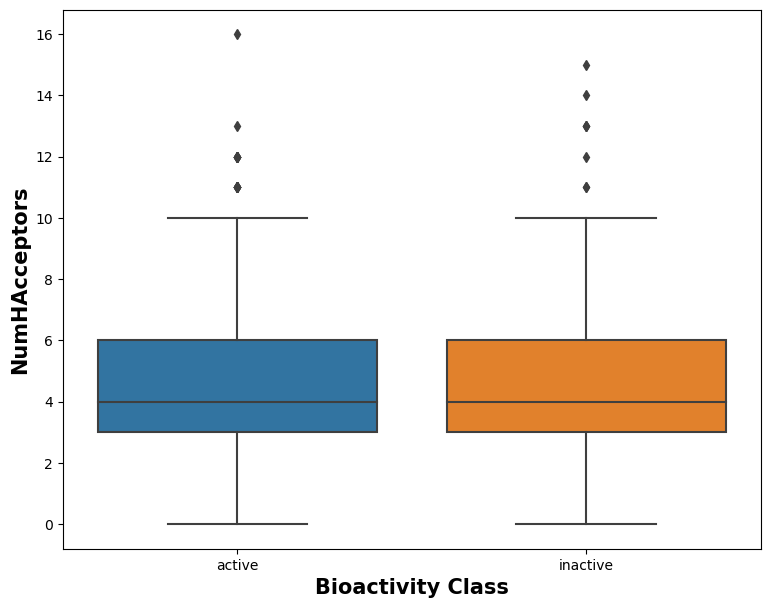

In [43]:
plt.figure(figsize=(9,7))

sns.boxplot(x=final_df1['class'], y=final_df1['NumHAcceptors'])

plt.ylabel('NumHAcceptors', fontsize=15, fontweight='bold')

plt.xlabel('Bioactivity Class', fontsize=15, fontweight='bold')

plt.show()

In [44]:
mannwhitney('NumHAcceptors')

,Descriptors,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2578939.5,0.00001,0.05,Different distribution (reject H0)


### Interpretation of the statistical Results:

#### Lipinski's descriptors:

All of the 4 Lipinski descriptors exhibited <b> statistical significant difference</b> between the <b> active </b> and <b> inactive. </b>


#### pIC50 values.

The <b>active</b> and <b>inactive</b> displayed statistically significant difference. Recall we used the threshold values for the $IC50$ to be $IC50 < 1000nM = active$ while $IC50 > 10, 000nM = inactive$.